In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [2]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,...,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [3]:
lista_eliminar= ['q8_l_recomendado', 'q11_tipo_plataforma',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

-----

q20 - q22, q25

Q20 = i_actual

Q21 = e_tamanio

Q22 = e_analistas

Q24 = e_actividades

Q25 = salario_actual

df: ocupación = analistas de datos

¿En que industrias hay mayor presencia de analistas de datos? q20 hue=género (Naty)

In [11]:
df.head(1)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,...,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [12]:
df['q5_ocupacion'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [13]:
df_analistas = df[df['q5_ocupacion'] == 'Data Analyst']

In [14]:
df_analistas.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

In [15]:
eliminar_industria = [ 'q1_edad', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma','q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

In [16]:
df_analistas.drop(columns = eliminar_industria, axis = 1, inplace = True)

/tmp/ipykernel_1153/2627596570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analistas.drop(columns = eliminar_industria, axis = 1, inplace = True)


In [17]:
df_analistas['genero_new'] = df_analistas['q2_genero'].replace({
'Man': 'Man', 
'Woman': 'Woman', 
'Prefer to self-describe': 'Others', 
'Nonbinary': 'Others', 
'Prefer not to say': 'Others'}) 



/tmp/ipykernel_1153/1654612015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analistas['genero_new'] = df_analistas['q2_genero'].replace({


In [18]:
df_analistas.head(1)

,q2_genero,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,genero_new
16,Man,Energy/Mining,"1000-9,999 employees",5-9,"2,000-2,999",Man


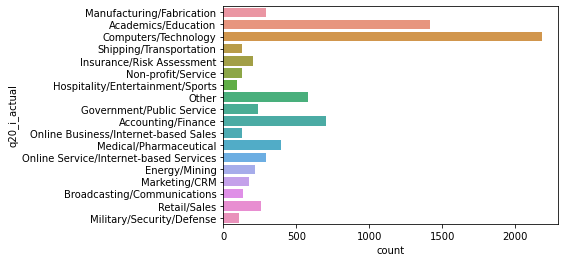

In [19]:
sns.countplot(data=df_top_5 , y= 'q20_i_actual');

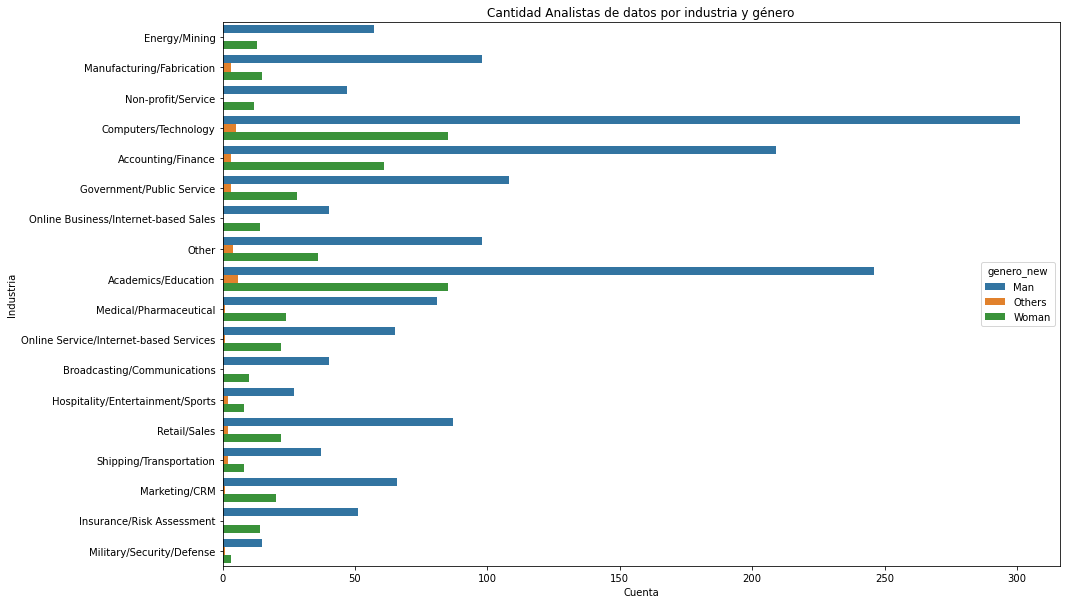

In [26]:
plt.figure(figsize =(15,10))

fig = sns.countplot(y='q20_i_actual', data = df_analistas, hue = 'genero_new')

fig.set(ylabel='Industria', xlabel= 'Cuenta' )
#plt.xticks(rotation = 45)

fig.set_title('Cantidad Analistas de datos por industria y género');

#Enfocamos el analisis en industrias donde hay muchos analistas pero pocas mujeres?  



- Como era de esperar, observamos que la industria en la que más analistas de datos hay es en computacion y tecnologia, y una vez más, son muchos más los hombres que las mujeres.

- La segunda industria en la que más anallistas trabajan es la educación, lo cual para nosotras es una buena señal, ya que puede querer decir que hay muchas personas queriendo aprender sobre el sectord del Data. 
Son menos las mujeres que los hombres, por eso creemos importante enseñar muy bien a las alumnas de Adalab para que posteriormente puedan incluirse en el sector de la enseñanza o crear un bootcamp mas enfocado a formar mujeres con capacidad y vocación educativa que quieran redirigir su carrera profesional. (quizás cansadas de los menores o de las asignaturas que llevan impartiendo años.)

- Observamos que la tercera industria con mas analistas es la financiera, donde el numero de mujeres es infímo. Quizás estas dos últimas opciones necesitan que las mujeres que se postulen a Adalab tengan algún conocimiento previo en el sector, o sería lo ideal, pero de nuevo creemos que una asignatura más enfocada a análisis númericos y economía podría ser un buen nicho de mercado para Adalab. 

- Aunque centramos nuestro análisis y propuestas son para industrias que tienen una alta cantidad de Analistas, hay una que tiene pocos pero en la que pensamos que esta aptitud es fundamental, cada día más, y que a día de hoy es una de las que menor numero de analistas tienen: Marketing y CRM. 
En esta no es que el número de hombres sea muy alto, pero las mujeres ni existen apenas. Por lo tanto, podría ser nuestro mejor nicho de mercado, ya que tendríamos menos competencia con varones a la hora de acceder a puestos, algo que lamentablemente a día de hoy seguiría siendo una ventaja para las mujeres. Es por ello que recomendaríamos e impulsaríamos a Adalab a realizar campañas de MK o acciones que se dirijan a esta industria, para encontrar mujeres que tengan conocimientos previos sobre esto y que al formarse en Data Analytics ocupen gran parte de los puestos que haya y puedan surgir de aquí a futuro. 


-